In [170]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import re
import mygene
import random
import time
import os

import plotly_express as px

from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


import warnings
warnings.filterwarnings('ignore')

## Creating smaller chunk with all genes and random samples

In [28]:
def count_base(data):
    n = float('inf')
    
    for (path, _) in data:
        n = min(n, pd.read_csv(path, usecols=['label']).shape[0])

    return n

In [29]:
def filter_df(df):
    dfg = df.groupby(df["label"]).count()
    
    tcga_count = dfg.iloc[1, 0]
    gtex_count = dfg.iloc[0, 0]
    total_count = tcga_count + gtex_count

    return pd.concat([
        df[df['label'] == 1].sample(n=int(tcga_count * base_count / total_count)),
        df[df['label'] == 0].sample(n=int(gtex_count * base_count / total_count))
    ])

In [30]:
def create_merged_df(data):
    frames = []
    
    for (path, name) in data:
        print('Processing {} dataframe'.format(name))

        df = filter_df(pd.read_csv('../Output/Chunk_Skin.csv', index_col=0))
        df.columns = [(re.sub('\.\d+', '', gene)) for gene in df.columns]
        df.drop(columns=['label'], inplace=True)
        df.insert(loc=0, column='cancer', value=name)
        
        frames.append(df)

    print('Finished')
    return pd.concat(frames)

In [27]:
items = [
    ("../Output/Chunk_Skin.csv", "skin"),
    ("../Output/Chunk_Breast.csv", "breast"),
    ("../Output/Chunk_Thyroid_ThyroidGland.csv", "thyr"),
    ("../Output/Chunk_Colon.csv", "colon"),
    ("../Output/Chunk_LungAdenocarcinoma_Lung.csv", "lungA"),
    ("../Output/Chunk_LungSquamousCellCarcinoma_Lung.csv", "lungS")   
]

base_count = count_base(items)

In [31]:
df = create_merged_df(items)

Processing skin dataframe
Processing breast dataframe
Processing thyr dataframe
Processing colon dataframe
Processing lungA dataframe
Processing lungS dataframe
Finished


In [36]:
df.head()

cancer  ENSG00000167578  ENSG00000078237  ENSG00000146083  \
TCGA-EB-A44P-01   skin           6.1433           4.3758           4.6871   
TCGA-EB-A431-01   skin           5.1437           4.2929           3.9002   
TCGA-EB-A5SF-01   skin           4.9007           2.0004           4.0679   
TCGA-EB-A41A-01   skin           5.7337           2.6185           4.2847   
TCGA-XV-AAZW-01   skin           6.3684           3.2811           3.2511   

                 ENSG00000158486  ENSG00000198242  ENSG00000134108  \
TCGA-EB-A44P-01          -9.9658          10.0412           6.1299   
TCGA-EB-A431-01          -4.0350          10.0256           6.3646   
TCGA-EB-A5SF-01          -2.2447           9.8412           3.1701   
TCGA-EB-A41A-01          -6.5064          10.2545           4.9584   
TCGA-XV-AAZW-01          -3.8160          10.4888           4.9416   

                 ENSG00000172137  ENSG00000276644  ENSG00000094963  ...  \
TCGA-EB-A44P-01          -4.2934          -6.5064          -9.9658  ...   
TCGA-EB-A431-01          -3.3076          -1.6394          -2.8262  ...   
TCGA-EB-A5SF-01           4.7485          -4.6082          -1.1172  ...   
TCGA-EB-A41A-01          -1.8836          -3.4580          -4.2934  ...   
TCGA-XV-AAZW-01           2.1114          -5.5735          -1.2828  ...   

                 ENSG00000107863  ENSG00000213782  ENSG00000146707  \
TCGA-EB-A44P-01           3.8431           5.8210           3.6335   
TCGA-EB-A431-01           3.8451           5.5659           4.6445   
TCGA-EB-A5SF-01          -0.0130           3.6428           3.6680   
TCGA-EB-A41A-01           4.2048           5.1563           4.6730   
TCGA-XV-AAZW-01           3.0002           4.9194           4.3206   

                 ENSG00000158417  ENSG00000089177  ENSG00000186115  \
TCGA-EB-A44P-01           5.3754           3.2267          -9.9658   
TCGA-EB-A431-01           5.1627           2.1313          -9.9658   
TCGA-EB-A5SF-01           1.6093          -0.5973          -2.7274   
TCGA-EB-A41A-01           5.6651           2.0218          -9.9658   
TCGA-XV-AAZW-01           4.5766           1.0711          -5.0116   

                 ENSG00000009694  ENSG00000123685  ENSG00000105063  \
TCGA-EB-A44P-01          -9.9658           1.5661           5.7170   
TCGA-EB-A431-01          -6.5064           0.9716           6.5549   
TCGA-EB-A5SF-01          -9.9658           0.3573           5.5308   
TCGA-EB-A41A-01          -4.0350           1.9452           5.1416   
TCGA-XV-AAZW-01          -9.9658           1.0007           5.0879   

                 ENSG00000181518  
TCGA-EB-A44P-01          -9.9658  
TCGA-EB-A431-01          -9.9658  
TCGA-EB-A5SF-01          -9.9658  
TCGA-EB-A41A-01          -9.9658  
TCGA-XV-AAZW-01          -9.9658  

[5 rows x 19664 columns]

In [37]:
df.to_csv('../Output/Chunk_AllCancer_Split_{}.csv'.format(base_count))

In [44]:
df.columns

Index(['cancer', 'ENSG00000167578', 'ENSG00000078237', 'ENSG00000146083',
       'ENSG00000158486', 'ENSG00000198242', 'ENSG00000134108',
       'ENSG00000172137', 'ENSG00000276644', 'ENSG00000094963',
       ...
       'ENSG00000107863', 'ENSG00000213782', 'ENSG00000146707',
       'ENSG00000158417', 'ENSG00000089177', 'ENSG00000186115',
       'ENSG00000009694', 'ENSG00000123685', 'ENSG00000105063',
       'ENSG00000181518'],
      dtype='object', length=19664)

## Selecting genes from results

In [59]:
top = pd.read_csv("../Output/Result_Colon.csv", index_col=0)
top.head()

Total Count  Intogen  Gradient Boost Classifier  \
ENSG00000149451            4        0                          1   
ENSG00000175832            4        0                          1   
ENSG00000062038            4        0                          1   
ENSG00000143536            3        0                          0   
ENSG00000257524            3        0                          1   

                 Recursive Feature Elimination  Elastic Net  Boruta Tree  \
ENSG00000149451                              1            1            1   
ENSG00000175832                              1            1            1   
ENSG00000062038                              1            1            1   
ENSG00000143536                              1            1            1   
ENSG00000257524                              1            1            0   

                 Importances: Gradient Boost Classifier  \
ENSG00000149451                                0.000973   
ENSG00000175832                                0.004829   
ENSG00000062038                                0.732060   
ENSG00000143536                                0.000000   
ENSG00000257524                                0.000000   

                 Importances: Recursive Feature Elimination  \
ENSG00000149451                                         1.0   
ENSG00000175832                                         1.0   
ENSG00000062038                                         1.0   
ENSG00000143536                                         1.0   
ENSG00000257524                                         1.0   

                 Importances: Elastic Net  Importances: Boruta Tree  \
ENSG00000149451                 -0.002107                       0.0   
ENSG00000175832                  0.003976                       0.0   
ENSG00000062038                  0.008449                       0.1   
ENSG00000143536                 -0.005817                       0.0   
ENSG00000257524                 -0.000494                       0.0   

                 Importances: Intogen  
ENSG00000149451                   0.0  
ENSG00000175832                   0.0  
ENSG00000062038                   0.0  
ENSG00000143536                   0.0  
ENSG00000257524                   0.0

In [8]:
output_path = '../Output/'
ensembls = set()

for filename in os.listdir(output_path):
    if filename[:7] == 'Result_':
        dfi = pd.read_csv(output_path + filename, index_col=0, usecols=['Unnamed: 0', 'Total Count'])
        dfi = dfi[dfi['Total Count'] > 1]
        ensembls.update(dfi.index.tolist())
        
len(ensembls)

854

In [9]:
col_list = list(ensembls)

## Clustering of sample chunk across genes

In [103]:
df_genes = pd.read_csv('../Output/Chunk_AllCancer_Split_594.csv', index_col=0)

In [4]:
df_genes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3558 entries, TCGA-EB-A44P-01 to GTEX-ZDTT-0426-SM-4WKFL
Columns: 19664 entries, cancer to ENSG00000181518
dtypes: float64(19663), object(1)
memory usage: 533.8+ MB


In [5]:
df_genes.head()

cancer  ENSG00000167578  ENSG00000078237  ENSG00000146083  \
TCGA-EB-A44P-01   skin           6.1433           4.3758           4.6871   
TCGA-EB-A431-01   skin           5.1437           4.2929           3.9002   
TCGA-EB-A5SF-01   skin           4.9007           2.0004           4.0679   
TCGA-EB-A41A-01   skin           5.7337           2.6185           4.2847   
TCGA-XV-AAZW-01   skin           6.3684           3.2811           3.2511   

                 ENSG00000158486  ENSG00000198242  ENSG00000134108  \
TCGA-EB-A44P-01          -9.9658          10.0412           6.1299   
TCGA-EB-A431-01          -4.0350          10.0256           6.3646   
TCGA-EB-A5SF-01          -2.2447           9.8412           3.1701   
TCGA-EB-A41A-01          -6.5064          10.2545           4.9584   
TCGA-XV-AAZW-01          -3.8160          10.4888           4.9416   

                 ENSG00000172137  ENSG00000276644  ENSG00000094963  ...  \
TCGA-EB-A44P-01          -4.2934          -6.5064          -9.9658  ...   
TCGA-EB-A431-01          -3.3076          -1.6394          -2.8262  ...   
TCGA-EB-A5SF-01           4.7485          -4.6082          -1.1172  ...   
TCGA-EB-A41A-01          -1.8836          -3.4580          -4.2934  ...   
TCGA-XV-AAZW-01           2.1114          -5.5735          -1.2828  ...   

                 ENSG00000107863  ENSG00000213782  ENSG00000146707  \
TCGA-EB-A44P-01           3.8431           5.8210           3.6335   
TCGA-EB-A431-01           3.8451           5.5659           4.6445   
TCGA-EB-A5SF-01          -0.0130           3.6428           3.6680   
TCGA-EB-A41A-01           4.2048           5.1563           4.6730   
TCGA-XV-AAZW-01           3.0002           4.9194           4.3206   

                 ENSG00000158417  ENSG00000089177  ENSG00000186115  \
TCGA-EB-A44P-01           5.3754           3.2267          -9.9658   
TCGA-EB-A431-01           5.1627           2.1313          -9.9658   
TCGA-EB-A5SF-01           1.6093          -0.5973          -2.7274   
TCGA-EB-A41A-01           5.6651           2.0218          -9.9658   
TCGA-XV-AAZW-01           4.5766           1.0711          -5.0116   

                 ENSG00000009694  ENSG00000123685  ENSG00000105063  \
TCGA-EB-A44P-01          -9.9658           1.5661           5.7170   
TCGA-EB-A431-01          -6.5064           0.9716           6.5549   
TCGA-EB-A5SF-01          -9.9658           0.3573           5.5308   
TCGA-EB-A41A-01          -4.0350           1.9452           5.1416   
TCGA-XV-AAZW-01          -9.9658           1.0007           5.0879   

                 ENSG00000181518  
TCGA-EB-A44P-01          -9.9658  
TCGA-EB-A431-01          -9.9658  
TCGA-EB-A5SF-01          -9.9658  
TCGA-EB-A41A-01          -9.9658  
TCGA-XV-AAZW-01          -9.9658  

[5 rows x 19664 columns]

### Filtering with selected genes

In [12]:
df_genes_filtered = df_genes[col_list + ["cancer"]]
df_genes_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3558 entries, TCGA-EB-A44P-01 to GTEX-ZDTT-0426-SM-4WKFL
Columns: 855 entries, ENSG00000204424 to cancer
dtypes: float64(854), object(1)
memory usage: 23.2+ MB


### Filtering with top genes

In [104]:
final_genes = pd.read_csv("../Output/final_genes.csv", index_col=0)
final_genes.head()

Gene  Shap_Importance     Cancer  \
400  ENSG00000172425         0.755203   0_breast   
361  ENSG00000078399         0.660586   0_breast   
361  ENSG00000078399         0.080271    0_colon   
361  ENSG00000078399         0.049252    1_colon   
361  ENSG00000078399         0.099134  1_thyroid   

                               Combination  \
400                               0_breast   
361  0_breast, 0_colon, 1_colon, 1_thyroid   
361  0_breast, 0_colon, 1_colon, 1_thyroid   
361  0_breast, 0_colon, 1_colon, 1_thyroid   
361  0_breast, 0_colon, 1_colon, 1_thyroid   

                                      SHAP_Combination  
400                                 0.7552028894424438  
361  0.6605863571166992, 0.08027119934558868, 0.049...  
361  0.6605863571166992, 0.08027119934558868, 0.049...  
361  0.6605863571166992, 0.08027119934558868, 0.049...  
361  0.6605863571166992, 0.08027119934558868, 0.049...

In [101]:
top_genes = final_genes["Gene"].values.tolist()
#top_genes

In [106]:
type(top_genes)

list

In [114]:
final_genes_filtered = df_genes[top_genes + ["cancer"]]
final_genes_filtered.head(2)

ENSG00000172425  ENSG00000078399  ENSG00000078399  \
TCGA-EB-A44P-01          -1.5951          -0.5125          -0.5125   
TCGA-EB-A431-01          -4.6082          -2.5479          -2.5479   

                 ENSG00000078399  ENSG00000078399  ENSG00000154263  \
TCGA-EB-A44P-01          -0.5125          -0.5125          -0.0877   
TCGA-EB-A431-01          -2.5479          -2.5479          -1.9942   

                 ENSG00000154263  ENSG00000186832  ENSG00000101280  \
TCGA-EB-A44P-01          -0.0877           5.9143          -9.9658   
TCGA-EB-A431-01          -1.9942           0.4447          -9.9658   

                 ENSG00000124935  ...  ENSG00000008710  ENSG00000115705  \
TCGA-EB-A44P-01          -1.7322  ...           5.5100          -6.5064   
TCGA-EB-A431-01           2.2113  ...           4.5814          -4.2934   

                 ENSG00000115705  ENSG00000115705  ENSG00000115705  \
TCGA-EB-A44P-01          -6.5064          -6.5064          -6.5064   
TCGA-EB-A431-01          -4.2934          -4.2934          -4.2934   

                 ENSG00000160867  ENSG00000160867  ENSG00000103168  \
TCGA-EB-A44P-01           0.9038           0.9038           5.2895   
TCGA-EB-A431-01           2.0430           2.0430           4.5946   

                 ENSG00000103168  cancer  
TCGA-EB-A44P-01           5.2895    skin  
TCGA-EB-A431-01           4.5946    skin  

[2 rows x 445 columns]

### T-SNE

In [129]:
def tsne(chunk, nlabels, random_state, ncols = 500, perplexity=30):
        """
        Create T-SNE graph 
        """
        
        # Defining Model
        model = TSNE(learning_rate=100, perplexity=perplexity)
        
        chunk_y = chunk["cancer"]
        chunk_100 = chunk.drop(columns = "cancer").sample(ncols, axis = 1, random_state = random_state)

        # Fitting Model
        transformed = model.fit_transform(chunk_100)

        # Plotting 2d t-Sne
        x_axis = transformed[:, 0]
        y_axis = transformed[:, 1]

        plt.figure(figsize=(16,7))
        ax1 = plt.subplot(1, 2, 1)
        sns.scatterplot(
            x=x_axis, y=y_axis,
            hue=chunk_y,
            palette=sns.color_palette("hls"),
            legend="full",
            alpha=0.3,
            ax=ax1)

#### T-SNE random genes

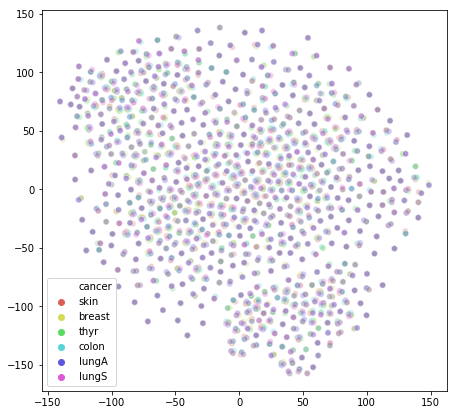

In [103]:
tsne(df_genes, df_genes["cancer"], random_state=1888)

#### T-SNE selected genes

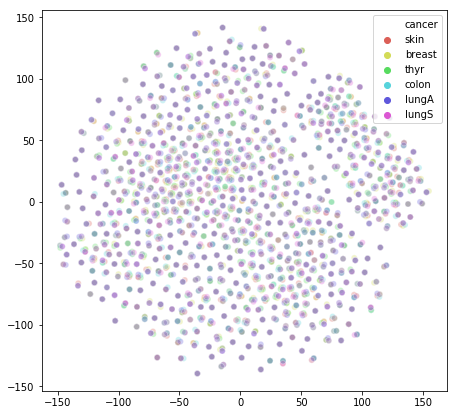

In [104]:
tsne(df_genes_filtered, df_genes_filtered["cancer"], random_state=1888)

#### T-SNE top genes

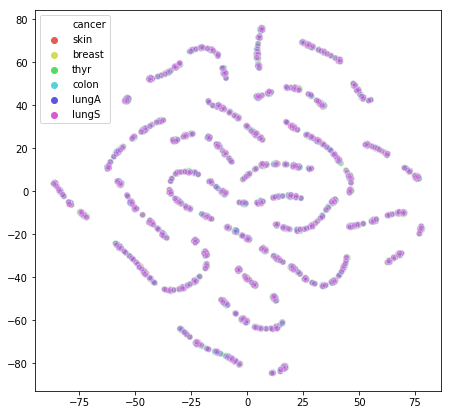

In [132]:
tsne(final_genes_filtered, final_genes_filtered["cancer"], random_state=1888, ncols=None)

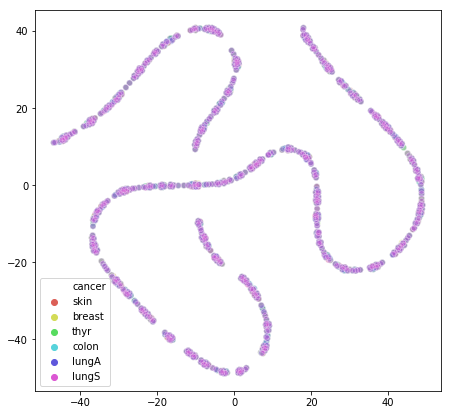

In [133]:
tsne(final_genes_filtered, final_genes_filtered["cancer"], random_state=1888, ncols=None, perplexity=70)

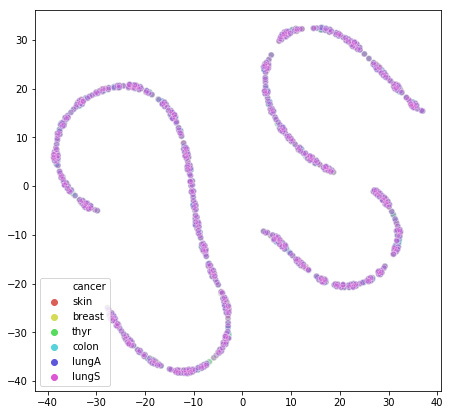

In [134]:
tsne(final_genes_filtered, final_genes_filtered["cancer"], random_state=1888, ncols=None, perplexity=100)

### PCA

In [140]:
def pca(df, random_state=1888, ncols = 500, n_components=3):
        """
        Create PCA graph 
        """
        
        # Defining x and y
        df_y = df["cancer"]
        df_x_sample = df.drop(columns = "cancer") #.sample(ncols, axis = 1, random_state = random_state)
        
        # Scaling
        minmax_scaler = MinMaxScaler()
        X_scaled = minmax_scaler.fit_transform(df_x_sample)
        
        # Defining Model
        model = PCA(n_components=n_components)

        # Fitting Model
        transformed = model.fit_transform(X_scaled)
        
        # Printing explained variance
        print(model.explained_variance_ratio_)
        
        # Creating df with principal components and label
        pca_df = pd.DataFrame(data=transformed, columns=["component_1", "component_2", "component_3"])
        cancer_label = df["cancer"]
        
        pca_df.reset_index(drop=True, inplace=True)
        cancer_label.reset_index(drop=True, inplace=True)
        finalDf = pd.concat([pca_df, cancer_label], axis=1)

        # Plotting 2d PCA

        fig, ax = plt.subplots(figsize=(14,8))
        
        sns.scatterplot(x=finalDf["component_1"], y=finalDf["component_2"], data=finalDf, hue=finalDf["cancer"], ax=ax)
        plt.title('PC1 against PC2')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.legend(loc='lower right')
        plt.show()

#### PCA random genes

/Users/luciepieckova/anaconda/envs/deeplearning/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[0.21749183 0.08793226 0.03465237]


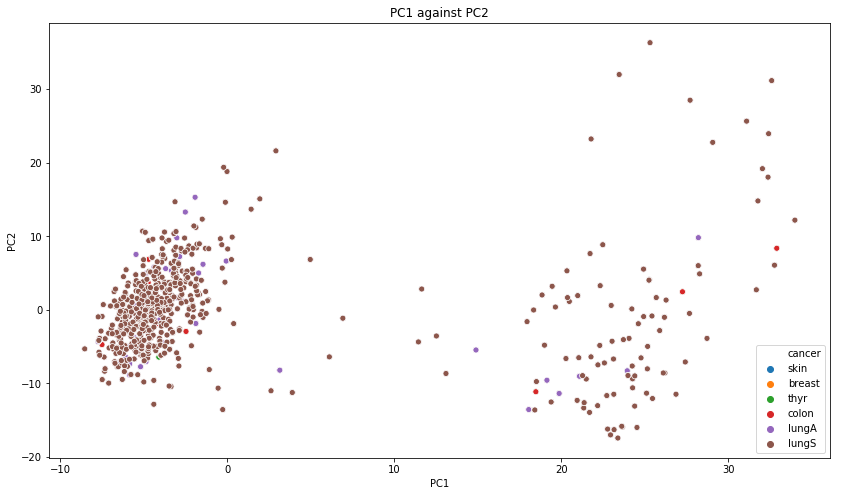

In [116]:
pca(df_genes)

#### PCA selected genes

/Users/luciepieckova/anaconda/envs/deeplearning/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[0.21749183 0.08793226 0.03465237]


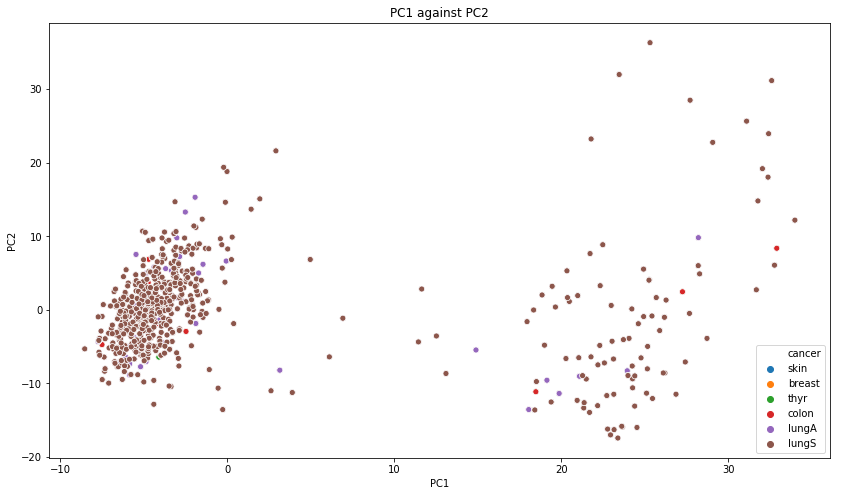

In [113]:
pca(df_genes_filtered)

#### PCA top genes

[0.44992798 0.13173907 0.05847783]


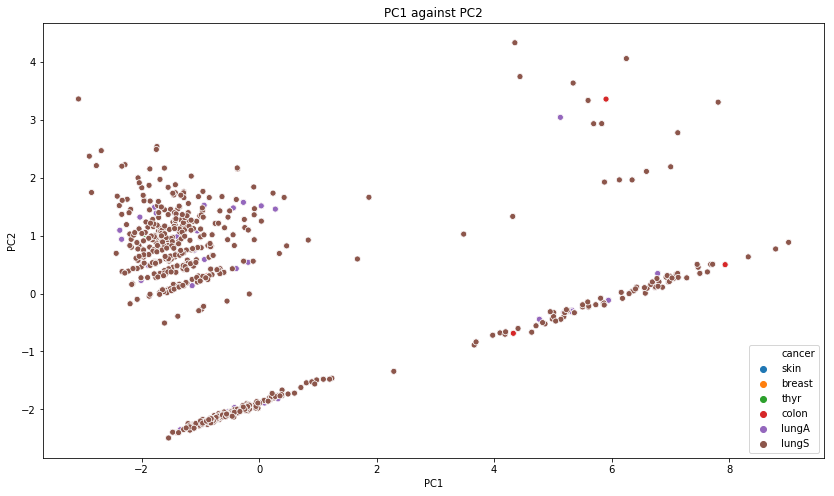

In [141]:
pca(final_genes_filtered, ncols=None)

### T-SNE after PCA

In [145]:
def tsne_from_pca(df, random_state=1888, ncols = 500, n_components=50, perplexity=40):
        """
            Create T-SNE graph after performing PCA
        """
        # PCA part
    
        # Defining x and y
        df_y = df["cancer"]
        df_x_sample = df.drop(columns = "cancer") #.sample(ncols, axis = 1, random_state = random_state)
        
        # Scaling
        minmax_scaler = MinMaxScaler()
        X_scaled = minmax_scaler.fit_transform(df_x_sample)
        
        # Defining Model
        model = PCA(n_components=n_components)

        # Fitting Model
        transformed = model.fit_transform(X_scaled)
        
        # Printing explained variance
        #print(model.explained_variance_ratio_)
    
        # T-SNE part
    
        # T-SNE model
        tsne = TSNE(n_components=2, verbose=0, perplexity=perplexity, n_iter=300)
        tsne_pca_results = tsne.fit_transform(transformed)
    
        # Plotting 2d t-Sne
        x_axis = tsne_pca_results[:, 0]
        y_axis = tsne_pca_results[:, 1]

        plt.figure(figsize=(16,7))
        ax1 = plt.subplot(1, 2, 1)
        sns.scatterplot(
            x=x_axis, y=y_axis,
            hue=df_y,
            palette=sns.color_palette("hls"),
            legend="full",
            alpha=0.3,
            ax=ax1)

#### T-SNE after PCA random genes

/Users/luciepieckova/anaconda/envs/deeplearning/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


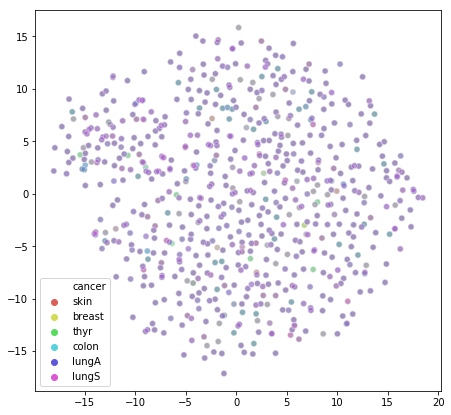

In [54]:
tsne_from_pca(df_genes)

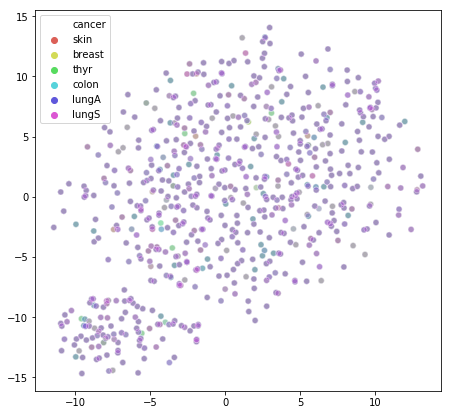

In [147]:
#tsne_from_pca(df_genes, perplexity=100)

#### T-SNE after PCA selected genes

/Users/luciepieckova/anaconda/envs/deeplearning/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


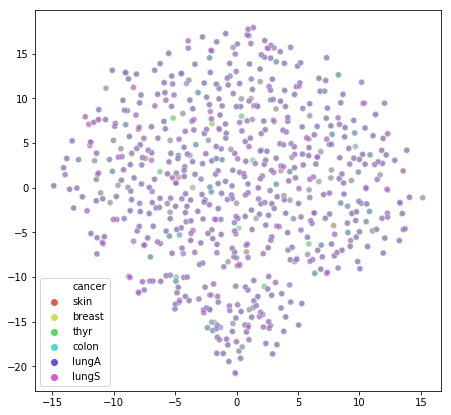

In [110]:
tsne_from_pca(df_genes_filtered)

#### T-SNE after PCA top genes

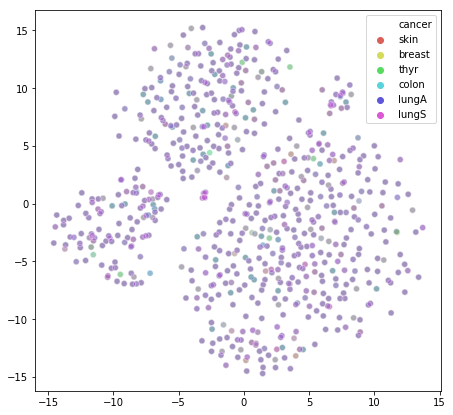

In [149]:
tsne_from_pca(final_genes_filtered, ncols=None, perplexity=70)

# Survival data

* OS, overall survival
* PFI, progression-free interval
* DFI, disease-free interval
* DSS, disease-specific survival

In [96]:
survival = pd.read_csv("../Output/Survival_clean.csv", index_col=0)
survival.head()

sample   OS  OS.time  DSS  DSS.time  DFI  DFI.time  PFI  PFI.time
0  TCGA-OR-A5J1-01  1.0   1355.0  1.0    1355.0  1.0     754.0  1.0     754.0
2  TCGA-OR-A5J3-01  0.0   2091.0  0.0    2091.0  1.0      53.0  1.0      53.0
4  TCGA-OR-A5J6-01  0.0   2703.0  0.0    2703.0  0.0    2703.0  0.0    2703.0
6  TCGA-OR-A5J8-01  1.0    579.0  1.0     579.0  1.0     530.0  1.0     530.0
7  TCGA-OR-A5J9-01  0.0   1352.0  0.0    1352.0  1.0     414.0  1.0     414.0

In [98]:
pdf = pd.read_csv("../Output/Chunk_AllCancers.csv", index_col=0)

In [99]:
pdf.head()

label  ENSG00000167578  ENSG00000078237  ENSG00000146083  \
Unnamed: 0                                                                     
TCGA-C8-A1HL-01  1_breast           4.9782           2.6624           3.9580   
TCGA-EW-A2FS-01  1_breast           5.7035           1.2696           4.2189   
TCGA-B6-A402-01  1_breast           4.1252           1.6234           5.0180   
TCGA-A2-A3XX-01  1_breast           4.8734           1.5998           4.1859   
TCGA-Z7-A8R5-01  1_breast           5.4973           1.3846           3.3017   

                 ENSG00000158486  ENSG00000198242  ENSG00000134108  \
Unnamed: 0                                                           
TCGA-C8-A1HL-01          -0.3752          10.7877           5.7415   
TCGA-EW-A2FS-01          -4.2934          10.1460           5.7801   
TCGA-B6-A402-01          -2.8262           9.8935           4.8929   
TCGA-A2-A3XX-01          -2.1140           9.8904           4.7247   
TCGA-Z7-A8R5-01          -5.5735          11.1398           4.6651   

                 ENSG00000172137  ENSG00000276644  ENSG00000094963  ...  \
Unnamed: 0                                                          ...   
TCGA-C8-A1HL-01           0.6239           3.3450          -0.1993  ...   
TCGA-EW-A2FS-01           1.4011           4.0532           2.3193  ...   
TCGA-B6-A402-01           2.9729          -3.6259           6.0603  ...   
TCGA-A2-A3XX-01           9.4821          -3.4580           5.2126  ...   
TCGA-Z7-A8R5-01           3.2080           1.4600           2.8522  ...   

                 ENSG00000107863  ENSG00000213782  ENSG00000146707  \
Unnamed: 0                                                           
TCGA-C8-A1HL-01           3.2251           4.9016           2.4727   
TCGA-EW-A2FS-01           3.5863           4.9327           3.1556   
TCGA-B6-A402-01           5.1107           5.3013           3.9801   
TCGA-A2-A3XX-01           4.1676           5.1169           4.4223   
TCGA-Z7-A8R5-01           2.6114           4.7176           4.0875   

                 ENSG00000158417  ENSG00000089177  ENSG00000186115  \
Unnamed: 0                                                           
TCGA-C8-A1HL-01           5.6511           5.1094          -9.9658   
TCGA-EW-A2FS-01           5.8510           4.4277          -6.5064   
TCGA-B6-A402-01           5.8592           3.1669          -9.9658   
TCGA-A2-A3XX-01           5.7195           3.0393          -6.5064   
TCGA-Z7-A8R5-01           3.6578           2.1509          -9.9658   

                 ENSG00000009694  ENSG00000123685  ENSG00000105063  \
Unnamed: 0                                                           
TCGA-C8-A1HL-01          -6.5064           1.0293           4.4095   
TCGA-EW-A2FS-01          -3.0469           1.4600           4.4081   
TCGA-B6-A402-01          -5.0116           2.5061           4.4490   
TCGA-A2-A3XX-01          -5.5735           2.0707           4.1078   
TCGA-Z7-A8R5-01          -4.6082           2.8522           4.4900   

                 ENSG00000181518  
Unnamed: 0                        
TCGA-C8-A1HL-01          -9.9658  
TCGA-EW-A2FS-01          -9.9658  
TCGA-B6-A402-01          -9.9658  
TCGA-A2-A3XX-01          -9.9658  
TCGA-Z7-A8R5-01          -9.9658  

[5 rows x 19664 columns]

In [100]:
pdf = pdf.reset_index().rename(columns={ 'Unnamed: 0': 'sample' })

### Merging with expression data

In [101]:
df_merged = survival.merge(pdf, left_on='sample', right_on='sample')

In [102]:
df_merged.to_csv("../Output/Merged_survival.csv")

In [103]:
df_merged.head()

sample   OS  OS.time  DSS  DSS.time  DFI  DFI.time  PFI  PFI.time  \
0  TCGA-3C-AAAU-01  0.0   4047.0  0.0    4047.0  1.0    1808.0  1.0    1808.0   
1  TCGA-3C-AALI-01  0.0   4005.0  0.0    4005.0  0.0    4005.0  0.0    4005.0   
2  TCGA-3C-AALJ-01  0.0   1474.0  0.0    1474.0  0.0    1474.0  0.0    1474.0   
3  TCGA-4H-AAAK-01  0.0    348.0  0.0     348.0  0.0     348.0  0.0     348.0   
4  TCGA-A1-A0SB-01  0.0    259.0  0.0     259.0  0.0     259.0  0.0     259.0   

      label  ...  ENSG00000107863  ENSG00000213782  ENSG00000146707  \
0  1_breast  ...           4.1094           5.6097           4.9089   
1  1_breast  ...           3.2900           5.2567           3.2328   
2  1_breast  ...           3.3605           5.0875           3.8228   
3  1_breast  ...           4.4270           5.1875           3.8729   
4  1_breast  ...           4.8274           5.3173           3.4635   

   ENSG00000158417  ENSG00000089177  ENSG00000186115  ENSG00000009694  \
0           4.9165           5.9331          -9.9658          -6.5064   
1           4.6933           5.9568          -5.5735          -6.5064   
2           4.8115           2.8858          -2.7274          -4.6082   
3           5.0610           3.8259          -2.3884          -4.0350   
4           5.1831           3.1971          -1.5951          -2.2447   

   ENSG00000123685  ENSG00000105063  ENSG00000181518  
0           0.1257           5.9414          -9.9658  
1           1.8036           6.2196          -9.9658  
2           1.8201           5.9286          -9.9658  
3           1.0915           5.6244          -9.9658  
4           0.3115           4.5311          -9.9658  

[5 rows x 19673 columns]

In [150]:
df_merged = pd.read_csv("../Output/Merged_survival.csv")

In [108]:
df_merged_label = df_merged[["label","sample", "OS", "OS.time", "DSS", "DSS.time", "DFI", "DFI.time", "PFI", "PFI.time"]]
df_merged_label.to_csv("../Output/Merged_survival_label.csv")

In [104]:
df_merged_filtered = df_merged[["sample", "label", "OS", "OS.time"] + col_list]
df_merged_filtered.head(2)

sample     label   OS  OS.time  ENSG00000204424  ENSG00000144785  \
0  TCGA-3C-AAAU-01  1_breast  0.0   4047.0          -9.9658           2.0111   
1  TCGA-3C-AALI-01  1_breast  0.0   4005.0          -4.6082           1.4281   

   ENSG00000039537  ENSG00000186471  ENSG00000096395  ENSG00000115607  ...  \
0          -3.1714          -9.9658          -9.9658          -2.5479  ...   
1          -2.3884          -4.6082          -9.9658          -0.3752  ...   

   ENSG00000250641  ENSG00000112378  ENSG00000135931  ENSG00000273079  \
0          -3.8160           4.6742           3.4129          -9.9658   
1          -9.9658           6.2188           3.1637          -9.9658   

   ENSG00000115507  ENSG00000204379  ENSG00000257727  ENSG00000163092  \
0          -3.6259          -9.9658           7.1608          -9.9658   
1           1.3397          10.4922           6.7294          -6.5064   

   ENSG00000147889  ENSG00000185988  
0           4.4128          -1.7322  
1           3.8126          -1.5522  

[2 rows x 858 columns]

In [151]:
top_genes_merged = df_merged[["sample", "label", "OS", "OS.time"] + top_genes]
top_genes_merged.head(2)

sample     label   OS  OS.time  ENSG00000172425  ENSG00000078399  \
0  TCGA-3C-AAAU-01  1_breast  0.0   4047.0           2.3135          -0.4921   
1  TCGA-3C-AALI-01  1_breast  0.0   4005.0           2.4279           0.1903   

   ENSG00000078399  ENSG00000078399  ENSG00000078399  ENSG00000154263  ...  \
0          -0.4921          -0.4921          -0.4921          -0.0725  ...   
1           0.1903           0.1903           0.1903           0.1648  ...   

   ENSG00000129467  ENSG00000008710  ENSG00000115705  ENSG00000115705  \
0           2.3019           6.0987          -1.5951          -1.5951   
1           3.1294           5.1023          -0.5756          -0.5756   

   ENSG00000115705  ENSG00000115705  ENSG00000160867  ENSG00000160867  \
0          -1.5951          -1.5951           1.6964           1.6964   
1          -0.5756          -0.5756           6.0264           6.0264   

   ENSG00000103168  ENSG00000103168  
0           5.2040           5.2040  
1           4.9654           4.9654  

[2 rows x 448 columns]

In [90]:
df_merged_filtered.to_csv("../Output/Merged_filtered_os_survival.csv")

In [9]:
df_merged_filtered = pd.read_csv("../Output/Merged_filtered_os_survival.csv", index_col=0)

In [153]:
top_genes_merged.to_csv("../Output/Merged_os_top_genes.csv")

### Boxplot

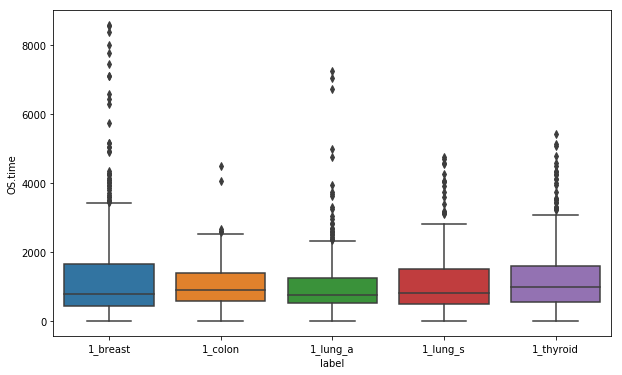

In [81]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="label", y="OS.time", data=df_merged_filtered) #hue="OS", 
plt.show()

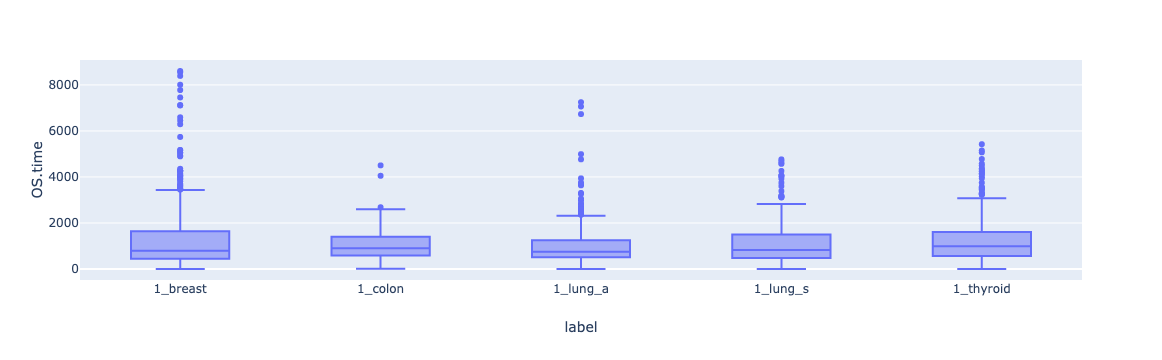

In [86]:
#plt.figure(figsize=(10,6))
px.box(df_merged_filtered, x="label", y="OS.time")

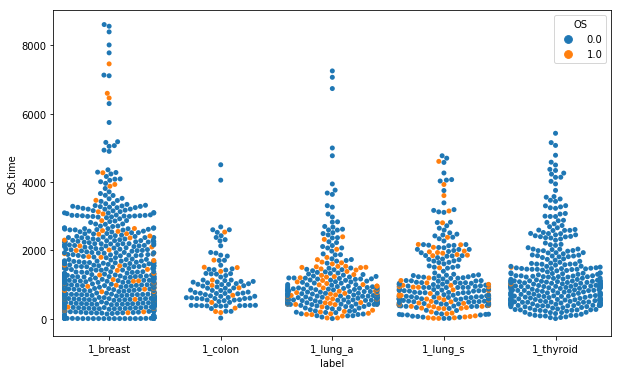

In [74]:
plt.figure(figsize=(10,6))
sns.swarmplot(x="label", y="OS.time", hue="OS", data=df_merged_filtered)
plt.show()

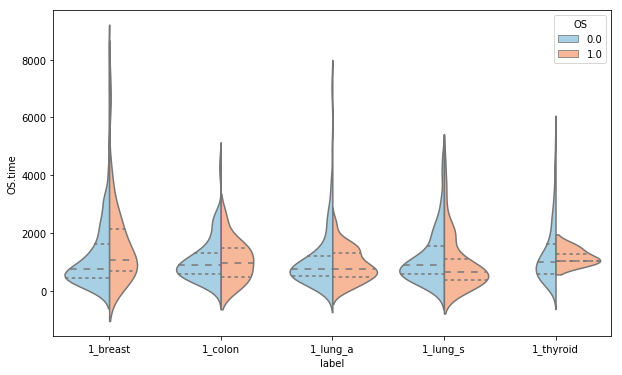

In [267]:
plt.figure(figsize=(10,6))
sns.violinplot(x="label", y="OS.time", hue="OS",
               split=True, inner="quart",
               palette="RdBu_r", #{1.0: "orange", 0.0: "blue"},
               saturation=1,
               data=df_merged_filtered)
#sns.despine(left=True)

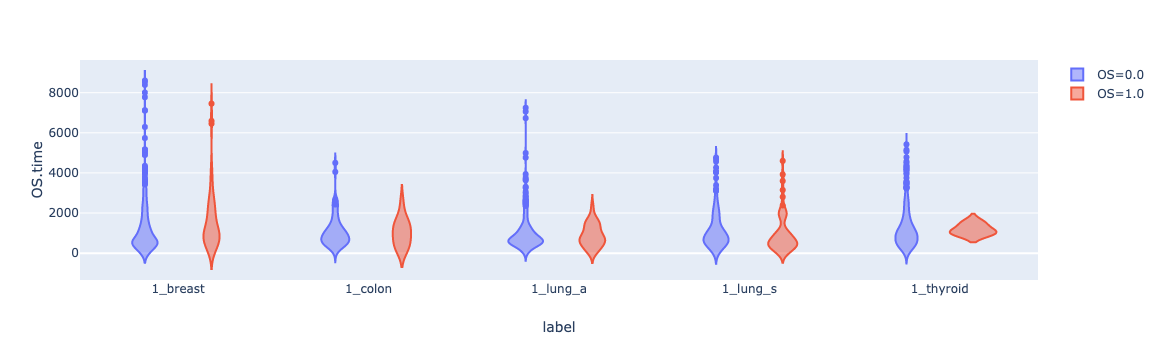

In [92]:
px.violin(df_merged_filtered, x="label", y="OS.time", color="OS")

#### T-SNE function

In [187]:
def tsne_os(data_x, data_y, random_state=1888, ncols = 500, perplexity=30):
        
        model = TSNE(learning_rate=20, random_state=random_state, perplexity=perplexity)
        
        transformed = model.fit_transform(data_x)

        # Plotting 2d t-SNE
        x_axis = transformed[:, 0]
        y_axis = transformed[:, 1]

        plt.figure(figsize=(16,7))
        ax1 = plt.subplot(1, 2, 1)
        sns.scatterplot(
            x=x_axis, y=y_axis,
            hue=data_x["OS"],  #data_y, #data_x["OS.time"]
            #palette=plt.cm.get_cmap('RdBu', 20), #plt.cm.get_cmap('RdBu', 20),#sns.color_palette("hls"),
            legend="brief",
            alpha=0.3,
            ax=ax1)

#### T-SNE OS.time/ cancers

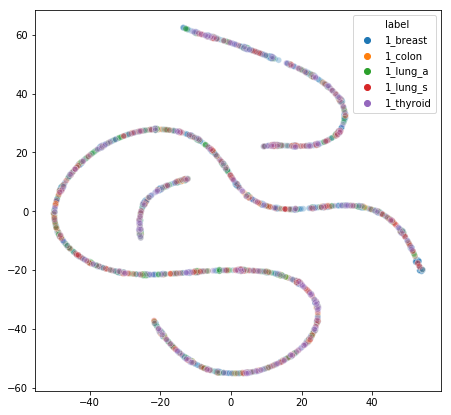

In [41]:
data_y = df_merged_filtered["label"]
data_x = df_merged_filtered["OS.time"].values.reshape(-1, 1) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x, data_y)

#perplexity 30 (default)

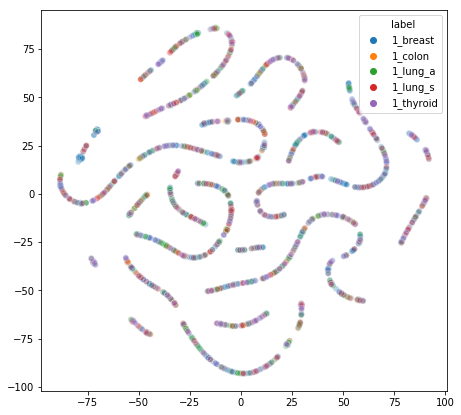

In [121]:
#data_y = df_merged_filtered["label"]
#data_x = df_merged_filtered["OS.time"].values.reshape(-1, 1) #.sample(ncols, axis = 1, random_state = 1888)

#tsne_os(data_x, data_y)

# perplexity=10

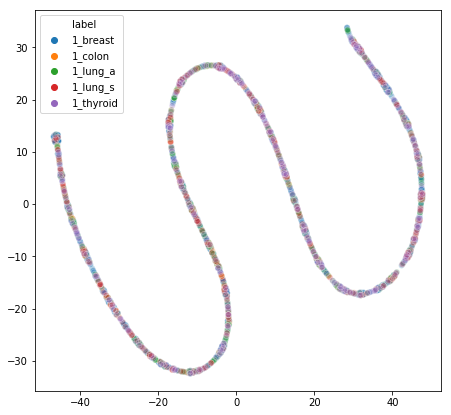

In [130]:
#data_y = df_merged_filtered["label"]
#data_x = df_merged_filtered["OS.time"].values.reshape(-1, 1) #.sample(ncols, axis = 1, random_state = 1888)

#tsne_os(data_x, data_y)

# perplexity=50

#### T-SNE OS.time/ OS

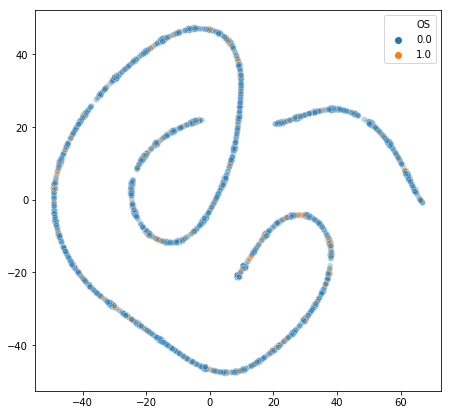

In [190]:
data_y1 = df_merged_filtered["OS"]
data_x1 = df_merged_filtered["OS.time"].values.reshape(-1, 1) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x1, data_y1)

#### T-SNE OS/ expression

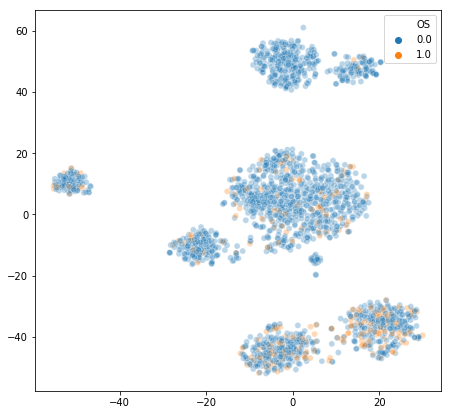

In [72]:
# selected genes

data_y2 = df_merged_filtered["OS"]
data_x2 = df_merged_filtered.drop(columns=["OS.time", "label", "OS", "sample"]) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x2, data_y2)

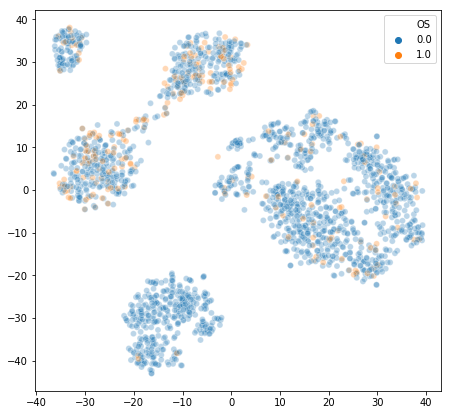

In [157]:
# top genes

data_y2 = top_genes_merged["OS"]
data_x2 = top_genes_merged.drop(columns=["OS.time", "label", "OS", "sample"]) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x2, data_y2)

#### T-SNE OS/ OS.time + expression

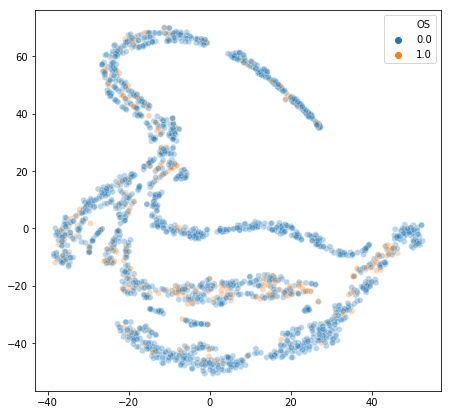

In [200]:
# selected genes

data_y6 = df_merged_filtered["OS"]
data_x6 = df_merged_filtered.drop(columns=["label", "sample", "OS"]) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x6, data_y6)

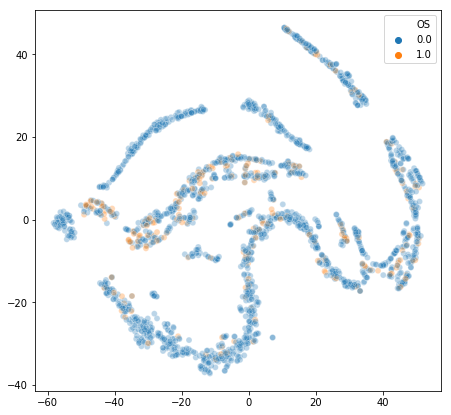

In [158]:
# top genes

data_y6 = top_genes_merged["OS"]
data_x6 = top_genes_merged.drop(columns=["label", "sample", "OS"]) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x6, data_y6)

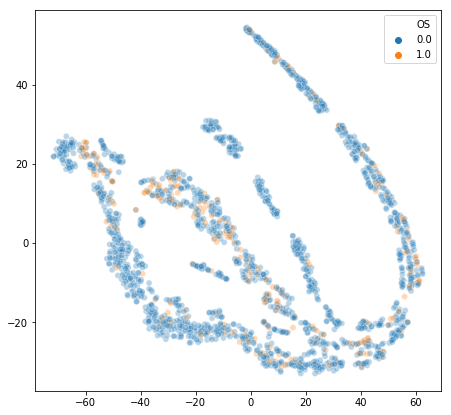

In [147]:
#data_y6 = df_merged_filtered["OS"]
#data_x6 = df_merged_filtered.drop(columns=["label", "sample", "OS"]) #.sample(ncols, axis = 1, random_state = 1888)

#tsne_os(data_x6, data_y6)

# random_state

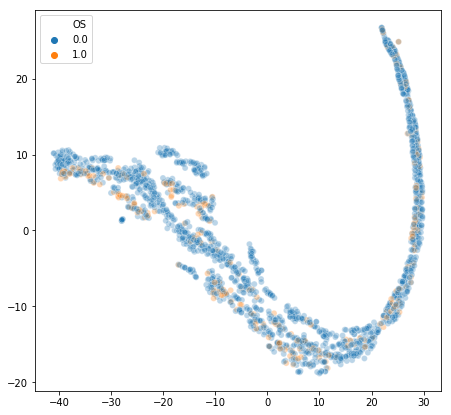

In [135]:
#data_y6 = df_merged_filtered["OS"]
#data_x6 = df_merged_filtered.drop(columns=["label", "sample", "OS"]) #.sample(ncols, axis = 1, random_state = 1888)

#tsne_os(data_x6, data_y6)

#perplexity = 100

#### T-SNE cancers/ expression

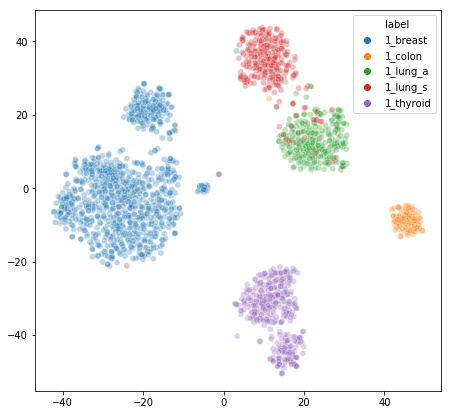

In [195]:
# selected genes

data_y3 = df_merged_filtered["label"]
data_x3 = df_merged_filtered.drop(columns=["OS.time", "label", "OS", "sample"]) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x3, data_y3)

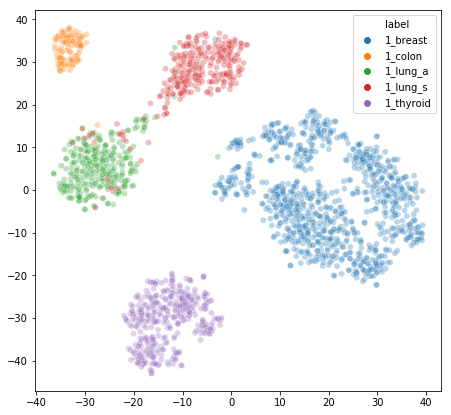

In [159]:
# top genes

data_y3 = top_genes_merged["label"]
data_x3 = top_genes_merged.drop(columns=["OS.time", "label", "OS", "sample"]) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x3, data_y3)

#### T-SNE cancers/ OS.time + expression

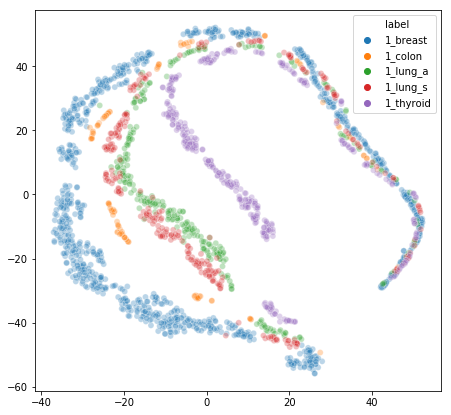

In [201]:
# selected genes

data_y5 = df_merged_filtered["label"]
data_x5 = df_merged_filtered.drop(columns=["label", "sample", "OS"]) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x5, data_y5)

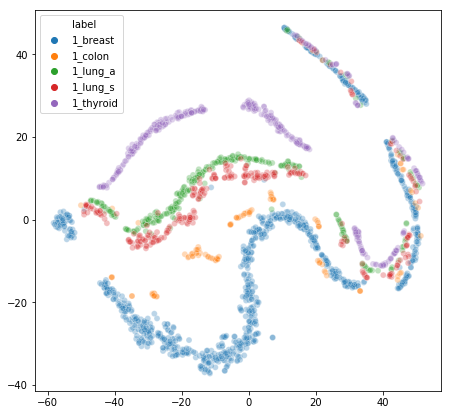

In [160]:
# top genes

data_y5 = top_genes_merged["label"]
data_x5 = top_genes_merged.drop(columns=["label", "sample", "OS"]) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x5, data_y5)

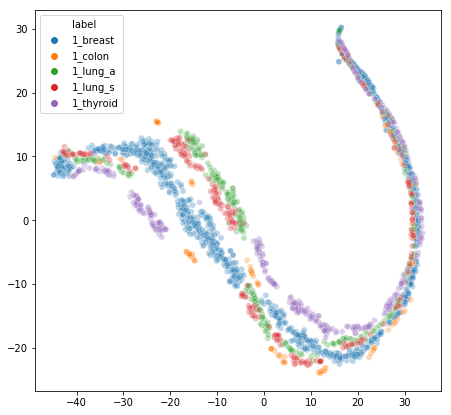

In [140]:
#data_y5 = df_merged_filtered["label"]
#data_x5 = df_merged_filtered.drop(columns=["label", "sample", "OS"]) #.sample(ncols, axis = 1, random_state = 1888)

#tsne_os(data_x5, data_y5)

#perplexity=80

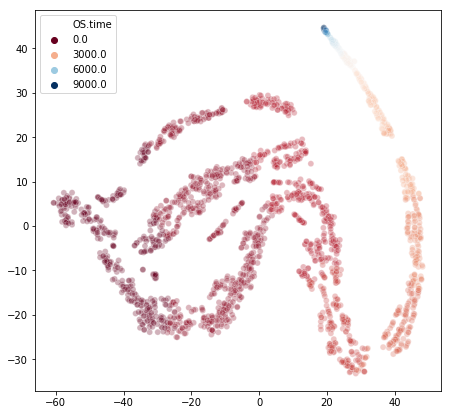

In [168]:
# selected genes

data_y15 = df_merged_filtered["label"]
data_x15 = df_merged_filtered.drop(columns=["label", "sample", "OS"]) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x15, data_y15)

# hue OS.time

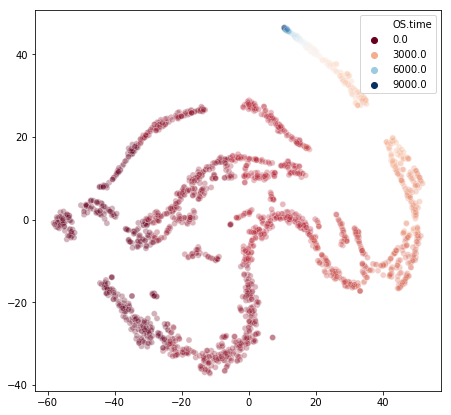

In [169]:
# top genes

data_y15 = top_genes_merged["label"]
data_x15 = top_genes_merged.drop(columns=["label", "sample", "OS"]) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x15, data_y15)

# hue OS.time

#### T-SNE cancers/ OS + expression

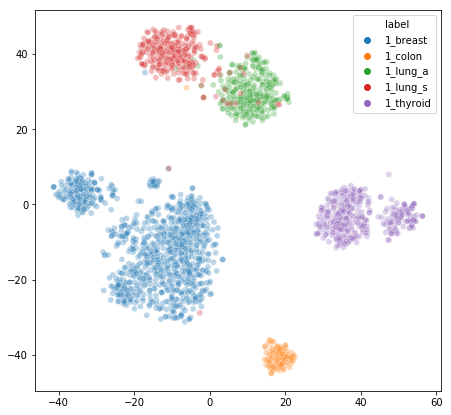

In [202]:
# selected genes

data_y7 = df_merged_filtered["label"]
data_x7 = df_merged_filtered.drop(columns=["label", "sample", "OS.time"]) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x7, data_y7)

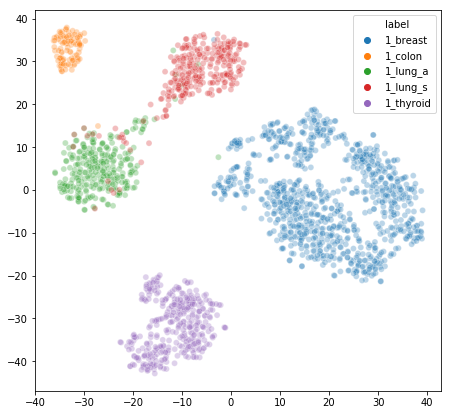

In [172]:
# top genes

data_y7 = top_genes_merged["label"]
data_x7 = top_genes_merged.drop(columns=["label", "sample", "OS.time"]) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x7, data_y7)

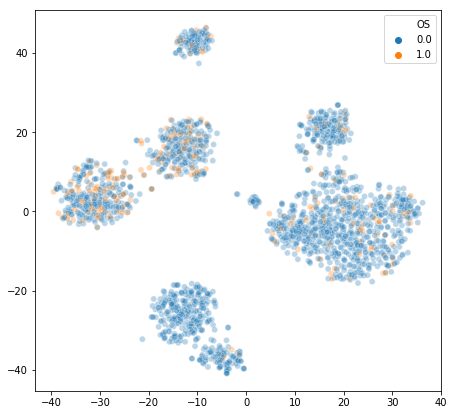

In [174]:
# selected genes
data_y17 = df_merged_filtered["label"]
data_x17 = df_merged_filtered.drop(columns=["label", "sample", "OS.time"]) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x17, data_y17)

# hue OS

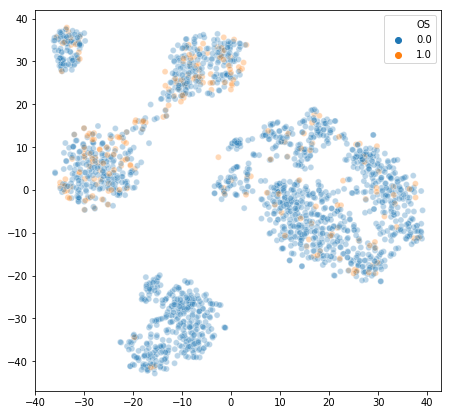

In [177]:
# top genes

data_y17 = top_genes_merged["label"]
data_x17 = top_genes_merged.drop(columns=["label", "sample", "OS.time"]) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x17, data_y17)

# hue OS

#### T-SNE cancers/ OS + OS.time + expression

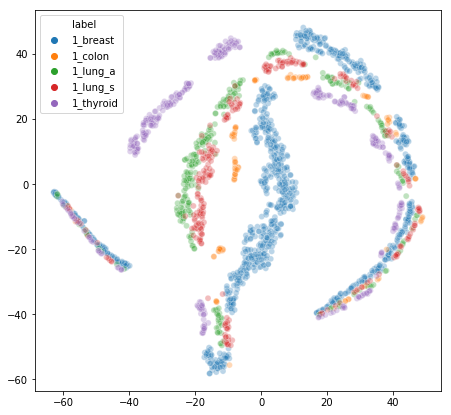

In [203]:
# selected genes

data_y8 = df_merged_filtered["label"]
data_x8 = df_merged_filtered.drop(columns=["label", "sample"]) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x8, data_y8)

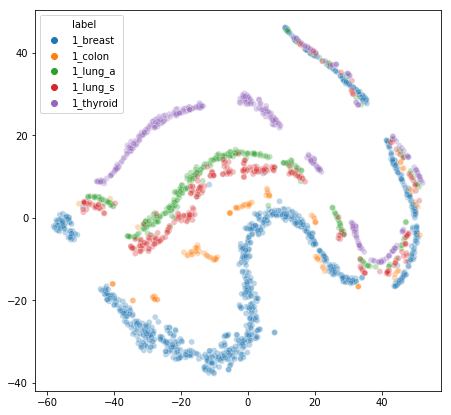

In [179]:
# top genes

data_y8 = top_genes_merged["label"]
data_x8 = top_genes_merged.drop(columns=["label", "sample"]) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x8, data_y8)

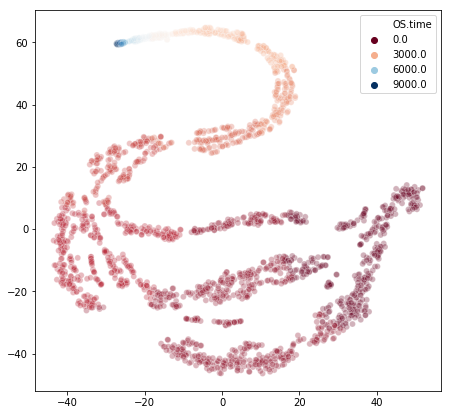

In [25]:
# selected genes

data_y10 = df_merged_filtered["label"]
data_x10 = df_merged_filtered.drop(columns=["label", "sample"]) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x10, data_y10)

#hue=data_x["OS.time"]
#cmap=plt.cm.get_cmap('RdBu', 20)
#legend="brief"

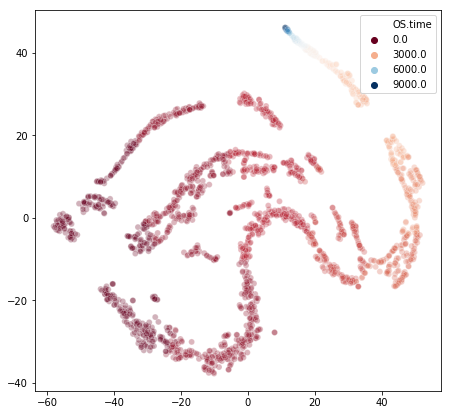

In [181]:
#top genes

data_y10 = top_genes_merged["label"]
data_x10 = top_genes_merged.drop(columns=["label", "sample"]) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x10, data_y10)

#hue=data_x["OS.time"]
#cmap=plt.cm.get_cmap('RdBu', 20)
#legend="brief"

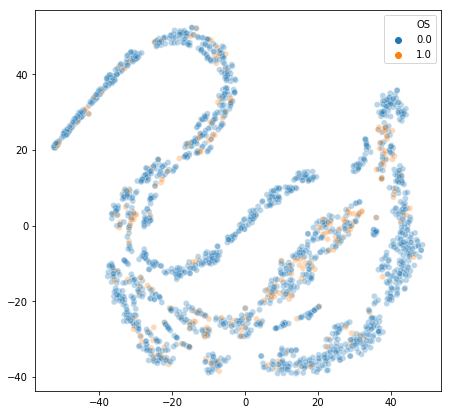

In [29]:
# selected genes

data_y11 = df_merged_filtered["label"]
data_x11 = df_merged_filtered.drop(columns=["label", "sample"]) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x11, data_y11)

#hue=data_x["OS"]
#legend="brief"

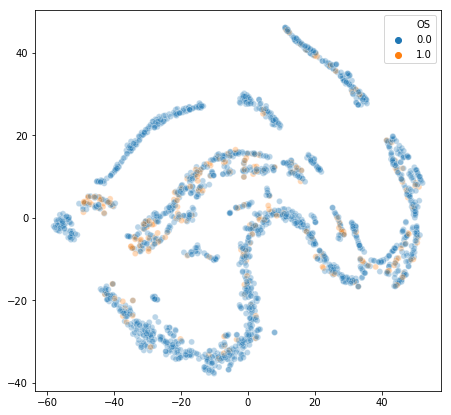

In [183]:
# top genes

data_y11 = top_genes_merged["label"]
data_x11 = top_genes_merged.drop(columns=["label", "sample"]) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x11, data_y11)

#hue=data_x["OS"]
#legend="brief"

#### T-SNE OS.time/ expression

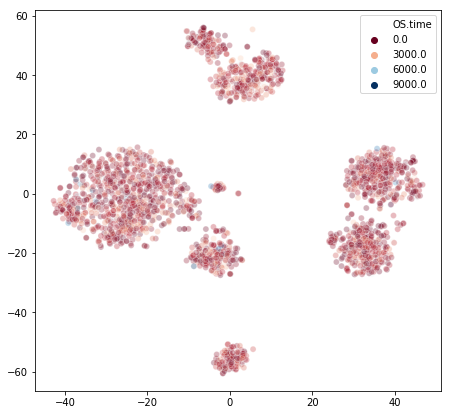

In [221]:
# selected genes

data_y4 = df_merged_filtered["OS.time"]
data_x4 = df_merged_filtered.drop(columns=["OS.time", "label", "OS", "sample"]) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x4, data_y4)

#cmap=plt.cm.get_cmap('RdBu', 20)
#legend="brief"

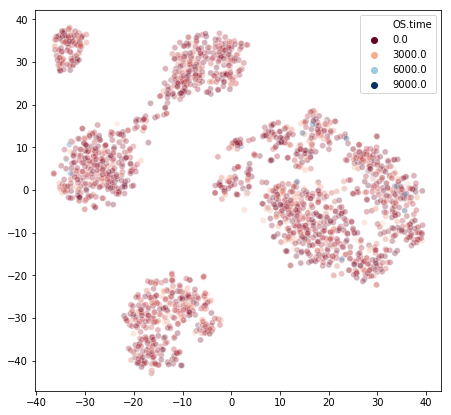

In [185]:
# top genes

data_y4 = top_genes_merged["OS.time"]
data_x4 = top_genes_merged.drop(columns=["OS.time", "label", "OS", "sample"]) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x4, data_y4)

#cmap=plt.cm.get_cmap('RdBu', 20)
#legend="brief"

#### T-SNE OS.time/ OS + expression

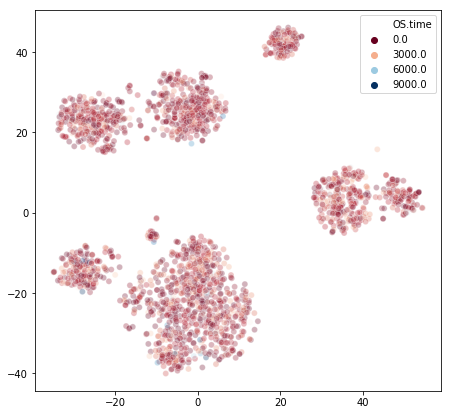

In [222]:
data_y9 = df_merged_filtered["OS.time"]
data_x9 = df_merged_filtered.drop(columns=["OS.time", "label", "sample"]) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x9, data_y9)

#cmap=plt.cm.get_cmap('RdBu', 20)
#legend="brief"

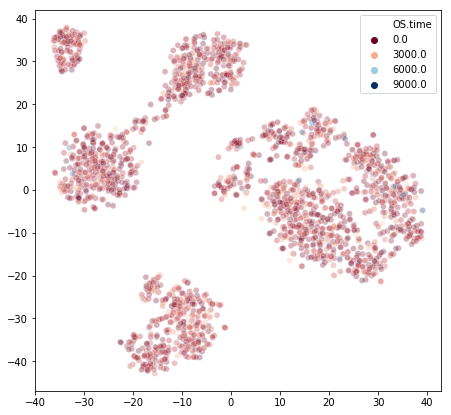

In [186]:
# top genes

data_y9 = top_genes_merged["OS.time"]
data_x9 = top_genes_merged.drop(columns=["OS.time", "label", "sample"]) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x9, data_y9)

#cmap=plt.cm.get_cmap('RdBu', 20)
#legend="brief"

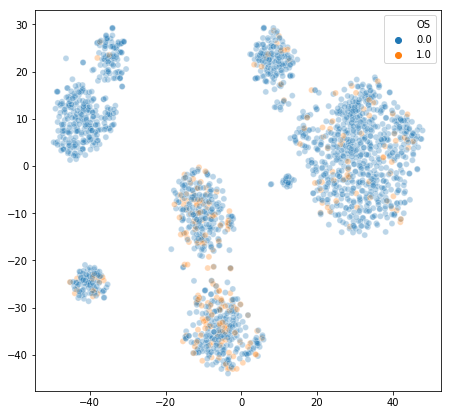

In [95]:
# selected genes

data_y19 = df_merged_filtered["OS.time"]
data_x19 = df_merged_filtered.drop(columns=["OS.time", "label", "sample"]) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x19, data_y19)

#hue="OS"

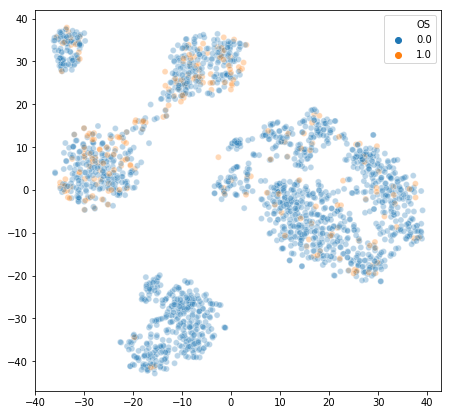

In [188]:
# top genes

data_y19 = top_genes_merged["OS.time"]
data_x19 = top_genes_merged.drop(columns=["OS.time", "label", "sample"]) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x19, data_y19)

#hue="OS"

### Kaplan Meier

In [10]:
df_merged_filtered.head()

sample     label   OS  OS.time  ENSG00000204424  ENSG00000144785  \
0  TCGA-3C-AAAU-01  1_breast  0.0   4047.0          -9.9658           2.0111   
1  TCGA-3C-AALI-01  1_breast  0.0   4005.0          -4.6082           1.4281   
2  TCGA-3C-AALJ-01  1_breast  0.0   1474.0          -3.8160           2.6895   
3  TCGA-4H-AAAK-01  1_breast  0.0    348.0          -9.9658           2.4779   
4  TCGA-A1-A0SB-01  1_breast  0.0    259.0          -9.9658           0.0854   

   ENSG00000039537  ENSG00000186471  ENSG00000096395  ENSG00000115607  ...  \
0          -3.1714          -9.9658          -9.9658          -2.5479  ...   
1          -2.3884          -4.6082          -9.9658          -0.3752  ...   
2          -0.2845          -2.3147          -9.9658          -0.4131  ...   
3          -1.8836          -3.0469          -9.9658          -2.1779  ...   
4          -1.3921          -4.6082          -9.9658          -4.2934  ...   

   ENSG00000250641  ENSG00000112378  ENSG00000135931  ENSG00000273079  \
0          -3.8160           4.6742           3.4129          -9.9658   
1          -9.9658           6.2188           3.1637          -9.9658   
2          -9.9658           4.6960           3.3952          -9.9658   
3          -9.9658           5.8334           4.7088          -9.9658   
4          -5.5735           6.8324           3.2617          -6.5064   

   ENSG00000115507  ENSG00000204379  ENSG00000257727  ENSG00000163092  \
0          -3.6259          -9.9658           7.1608          -9.9658   
1           1.3397          10.4922           6.7294          -6.5064   
2           1.3956          -9.9658           7.9614          -9.9658   
3          -0.1031          -9.9658           7.0911          -9.9658   
4           2.7139          -3.6259           7.1482          -9.9658   

   ENSG00000147889  ENSG00000185988  
0           4.4128          -1.7322  
1           3.8126          -1.5522  
2           4.2412          -0.8863  
3           4.9041          -9.9658  
4           2.4544          -9.9658  

[5 rows x 858 columns]

In [48]:
from lifelines import KaplanMeierFitter

import plotly.tools as tls  
#import plotly.plotly as py

kmf = KaplanMeierFitter()

In [16]:
#df_merged_filtered[(df_merged_filtered["label"]=="1_breast") & (df_merged_filtered["OS"]==1)]

In [82]:
breast = df_merged_filtered[df_merged_filtered["label"]=="1_breast"]
T = breast['OS.time']
C = breast['OS']

kmf.fit(T, event_observed=C)

<lifelines.KaplanMeierFitter: fitted with 922 observations, 848 censored>

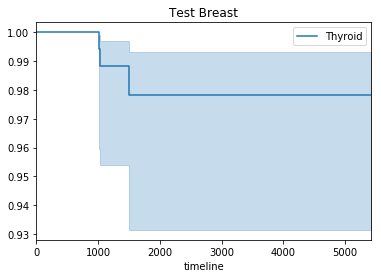

In [201]:
kmf.plot(title='Test Breast')

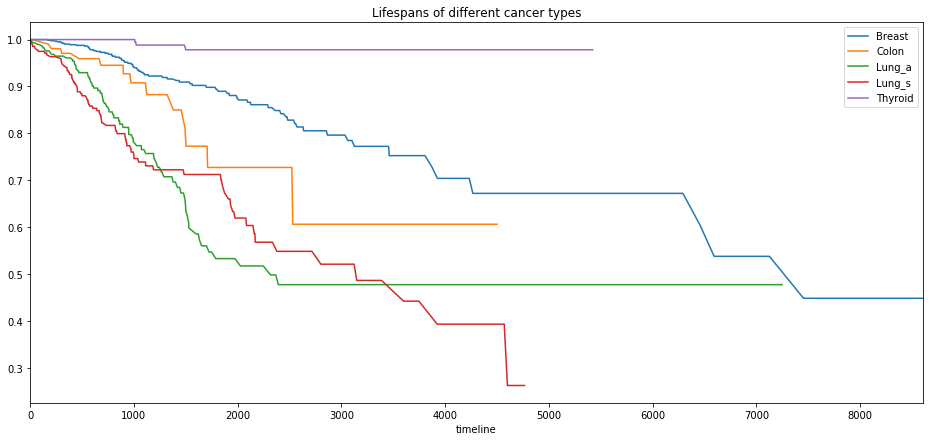

In [203]:
cancers = ["breast", "colon", "lung_a", "lung_s", "thyroid"] # skin cancer doesn't have 0S=1
    
def kaplan_plot(cancer):
    data = df_merged_filtered[df_merged_filtered["label"]=="1_" + cancer]
    T = data['OS.time']
    C = data['OS']
    ax = plt.subplot(111)
    
    fit = kmf.fit(T, event_observed=C, label=cancer.strip("_").capitalize())
    plot = kmf.survival_function_.plot(ax=ax)
    return plot

plt.figure(figsize=(16,7))
plt.title('Lifespans of different cancer types')

for cancer in cancers:
    kaplan_plot(cancer)
    
kmf_plot=plt.gcf()